## Chapter 8: Water treatment

By now you should have an idea of the food chain, how it is produced, how it is consumed and how waste from the process can be used to generate energy. This course has a biochemical engineering focus and accordingly we get a bit deeper into how micro-organisms or microbes are part of the food chain. As chemical engineers it is imperative to understand how microbes can be utilised to process product streams from the food chain. In the previous two chapters we have considered the processing of manure, foodwaste and non-edible plant material. It is important to understand that a major fraction of the nutrients from the food chain ends up in water, just think of what you flush down daily in the toilet. In this regard it is important to understand how microbes can assist in cleaning the water. Have a look at a generic outlay of a wastewater plant:

<img src="water1.png" width="650" />

You will see that the intial steps of wastewater treatment entails the removal of solids from the wastewater and that the collected solids are fed to an anaerobic digestion unit in order to generate energy. Once solids are removed there is still a lot of dissolved organics in the water and microbes are required to process these chemicals. Our focus in this chapter will mainly be on the biological treatment of the solid-lean water, where aerobic organisms are used to digest the nutrients. We can talk about aerobic digestion and approach the modeling in a very similar manner than before. The main difference will be the aeration required to supply the organisms with oxygen. To purify the water, carbon, nitrogen and minerals (especially phosphorous) have to be removed. Since the process is aerobic carbon can be metabolised to $CO_2$ that will escape as a gas. Nitrogen still has to be released from its organic state to form $NH_3$. There will also be a lot of $NH_3$ in the water from urine. In standard wastewater terminlogy the term **secondary wastewater treatment** is used to describe the biological processes. These processes can occur in multiple vessels and apart from removing carbon to $CO_2$, nitrogen is typically removed as $N_2$. The processes of converting $NH_3$ to $N_2$ is referred to as nitrification and denitrification, the latter being an anaerobic process. Note that minerals will be removed via live microbes referred to as **sludge**. Sludge can be fed to anaerobic digesters to decrease the carbon content and to free the nitrogen and minerals contained within the sludge.

In this chapter we will only look at carbon removal and $NH_3$ production from dissolved organic matter. We will work exclusively with continous processes since this is the standard mode of operation. Before we get into the modeling we'll look at standard measuring techniques to quantify the quality of wastewater. 

## COD and TOC

Chemical oxygen demand (COD) and total organic carbon (TOC) are standard measurement techniques in wastewater treatment. It is easy to understand these measurements by considering the mass balance where a given dissolved organic substance ($CH_xO_yN_z$) are fully oxidised to $CO_2$ and $N_2$. Let's consider the following reaction:

$$S+O_2 \rightarrow CO_2+N_2+H_2O$$

<img src="mat1.png" width="550" />


Note that the single specification states that one cmol of organic carbon is oxidised. COD is typically reported in milligrams of oxygen per liter while TOC is given in milligrams of carbon. Let's calculate:

In [5]:
import pandas
import numpy as np
S = np.matrix(pandas.read_excel('mat1a.xlsx'))

C= np.matrix([0, 0, 0,0,-1]).T
r = np.linalg.solve(S, C)
r

matrix([[-1.   ],
        [-1.075],
        [ 1.   ],
        [ 0.055],
        [ 0.9  ]])

In [6]:
MMs=12+S1[1,0]+S1[2,0]*16+S1[3,0]*14
COD=-r[1]*32 #gram of oxygen
TOC=-r[0]*12 #gram of carbon
[float(COD), float(TOC), float(COD/TOC)]

NameError: name 'S1' is not defined

Depending on the concentration of the organics in the water we can express the COD or TOC as an concentration. Typical COD values in wastewater range from 500 to 10000 $\frac{mg}{L}$. The COD to TOC typically varies between 1.5 and 4. Note that both TOC and COD gives an indication of the organic content of water, while COD is dependant on the oxidation state of the organic substance. If the oxygen content of the organics above is altered to 0.4 (in stead of 0.75) the COD will go up to 1.25 mole of $O_2$ while the TOC will stay constant.  

## Aerobic digestion of wastewater

The biological breakdown of organics is facilitates by microbes. The first step is to convert the carbon to microbial cells and $CO_2$ and the nitrogen to microbial cells and $NH_3$. The following reaction describes the overall reaction: 


$$S+O_2 \rightarrow X+CO_2+NH_3+H_2O$$


Let's import the matrix:

<img src="mat2.png" width="550" />


In [7]:
S1 = np.matrix(pandas.read_excel('mat1.xlsx'))

Looking at the fifth row we see the energy balance. You will see that the $\gamma$ value of 2.5 $\frac{mol \, ATP}{cmol \, X }$ is higher than the anaerobic value of 1.8 $\frac{mol \, ATP}{cmol \, X }$. This is becuase ATP is far more avaialble in a aerobic system and accordingly the organism is less efficient in conserving ATP. Remember from chapter 1 that we got 21 ATP from a mole of glucose, this will translate to 3.5 mol ATP per cmol of glucose. Compare this to the amount of ATP obtained in lactic acid (anaerobic) fermentation where only 2 ATPs are obtained per mole of glucose (or $\frac{1}{3}$ mol ATP per cmol of glucose). In this example we will assume that the breakdown of the organic to pyruvic acid will entail the use of ATP and accordingly we'll generate 2.5 mole of ATP per oxygen consumed. Note that we use the oxygen stream to assign the ATP generation rather than the substrate. This makes sense since it is easier to relate ATP generation with oxygen (remember the P/O ratios in chapter 1).

Note that the $\mu$ and $\theta$ values are higher than before. These are typical values for aerobic digestion. Aerobic digestion is also referred to as the activated sludge process, where the activated sludge refers to the microbial biomass in the process.  

In [9]:
thetamax,mumax=0.9,0.4   #mol ATP/cmolX/day and 1/day
C1= np.matrix([0, 0, 0,0,thetamax,mumax]).T
r = np.linalg.solve(S1, C1)
r

matrix([[-1.15465995],
        [-0.76      ],
        [ 0.4       ],
        [ 0.75465995],
        [ 0.57667506],
        [ 0.09501259]])

We will now model a continuous aerobic digester. Need more background here on mass transfer


In [22]:
Co_sat=7/1000/32
Ko=Co_sat*0.15
Ks=0.0007
kla=20/25 #per day

In [23]:
def response_fun(C):
    
    Cs, Co, Cx, Cn = C[0],C[1],C[2],C[3]   #Considered components
    
    mu=mumax*(Cs/(Ks+Cs))*(Co/(Ko+Co))        #this terms reduces mu or theta as substrate becomes limited, more about this later
    theta=thetamax*(Cs/(Ks+Cs))*(Co/(Ko+Co))

    C1= np.matrix([0, 0, 0,0,theta,mu]).T
    r = np.linalg.solve(S1, C1) 
    
        
    return [r[0,0],   # glucose-substrate S
            r[1,0],   # oxygen
            r[2,0],   # biomass
            r[5,0]]   # ammonia  

Remeber the cmol balance for a continuous reactor:

\begin{align*}
\frac{dC_i}{dt} &= D(C^F_i - C_i) + r_i C_X \\
\end{align*}

In [24]:
D=0.1  #day

MM_S=12+S[1,0]+S[2,0]*16+S[3,0]*14
MM_X=12+S[1,2]+S[2,2]*16+S[3,2]*14
Cfo=Co_sat
Cfx=0


In [25]:
def ferm_eq(t,C):
    Cs, Co, Cx, Cn = C[0],C[1],C[2],C[3]   #Considered components 
    r=response_fun([Cs, Co, Cx, Cn])      # this is the 'fetching' from the response function
    
    return [r[0]*Cx+D*(Cf[0]-Cs),                  #gluc
            r[1]*Cx+kla*(Co_sat-Co)+D*(Cf[1]-Co),  #o2
            r[2]*Cx+D*(Cf[2]-Cx),                  #x
            r[3]*Cx+D*(Cf[3]-Cn)]                   #n

In [26]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

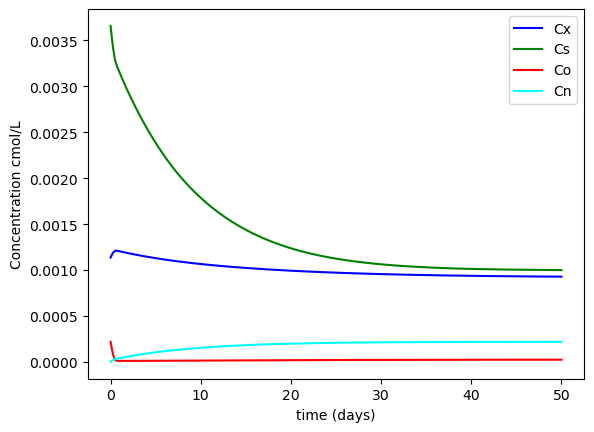

In [27]:
Cf=[0.1/MM_S,Co_sat,0,0]
Co=[0.1/MM_S,Co_sat,0.05/MM_X,0]

tmax = 50                               # time to integrate to  
tspan=np.linspace(0,tmax,200)            # define the timespan of the integration and increments where values will be reported
tper = (0,tmax)                          #defining the starting and end time for the solve_IVP function

Ci = solve_ivp(ferm_eq, tper, Co, dense_output = True, method = "LSODA")    # integration via odeint that calls apon response_fun

Cs, Co, Cx, Cn = Ci.sol(tspan)

plt.figure(3)
plt.plot(tspan, Cx, color='blue', label='Cx')
plt.plot(tspan, Cs, color='green', label='Cs')
plt.plot(tspan, Co, color='red', label='Co')
plt.plot(tspan, Cn, color='cyan', label='Cn')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (days)') 
plt.show() 

In [28]:
Cend=Ci.sol(tmax)
Cend

array([9.99459806e-04, 2.38844962e-05, 9.28247128e-04, 2.18731950e-04])

In [88]:
con=(Cf[0]-Cend[0])/Cf[0]
con

0.9228494530177422

In [80]:
def ferm_eq_SS(C):
    Cs, Co, Cx, Cn = C[0],C[1],C[2],C[3]   #Considered components 
    r=response_fun([Cs, Co, Cx, Cn])      # this is the 'fetching' from the response function
    
    return [r[0]*Cx+D*(Cf[0]-Cs),                  #gluc
            r[1]*Cx+kla*(Co_sat-Co)+D*(Cf[1]-Co),  #o2
            r[2]*Cx+D*(Cf[2]-Cx),                  #x
            r[3]*Cx+D*(Cf[3]-Cn)]                   #n

In [90]:
guess=[0.001,0.006,0.031,0]
from scipy.optimize import fsolve
SS=fsolve(ferm_eq_SS,guess)
SS

array([0.00028521, 0.00020771, 0.00116829, 0.0002775 ])

In [93]:
def ferm_eq_loop(C,D):
    Cs, Co, Cx, Cn = C[0],C[1],C[2],C[3]   #Considered components 
    r=response_fun([Cs, Co, Cx, Cn])      # this is the 'fetching' from the response function
    
    return [r[0]*Cx+D*(Cf[0]-Cs),                  #gluc
            r[1]*Cx+kla*(Co_sat-Co)+D*(Cf[1]-Co),  #o2
            r[2]*Cx+D*(Cf[2]-Cx),                  #x
            r[3]*Cx+D*(Cf[3]-Cn)]                   #n

In [97]:
Dspan=np.linspace(0.07,0.3,200) 

matrix=np.array([0,0,0,0])

for D in Dspan:
    
    guess = [0.001,0.006,0.031,0]
    C = fsolve(ferm_eq_loop,guess, args=(D,))
    matrix=np.vstack([matrix,C])
    
Ci=matrix[1:]

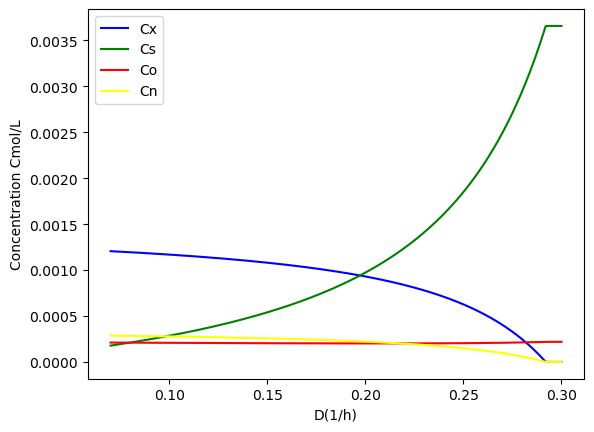

In [100]:
Cs,Cx,Co,Cn=Ci[:,0],Ci[:,2],Ci[:,1],Ci[:,3]

plt.figure(3)
plt.plot(Dspan, Cx, color='blue', label='Cx')
plt.plot(Dspan, Cs, color='green', label='Cs')
plt.plot(Dspan, Co, color='red', label='Co')
plt.plot(Dspan, Cn, color='yellow', label='Cn')
plt.legend(loc='best')
plt.ylabel('Concentration Cmol/L') 
plt.xlabel('D(1/h)') 
plt.show() 

In [13]:
kla

4.8

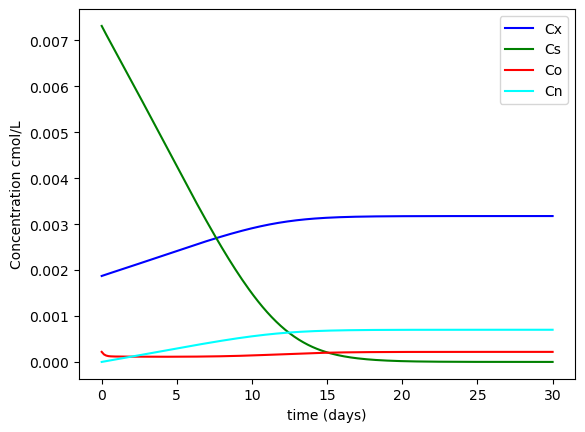

In [38]:
from scipy.integrate import solve_ivp

MM_S=12+S[1,0]+S[2,0]*16+S[3,0]*14
MM_X=12+S[1,2]+S[2,2]*16+S[3,2]*14

Co=[0.2/MM_S,Co_sat,0.05/MM_X,0,0]             #initial cmol value of S,X,A,P
                      
tmax = 30                               # time to integrate to  
tspan=np.linspace(0,tmax,200)            # define the timespan of the integration and increments where values will be reported
tper = (0,tmax)                          #defining the starting and end time for the solve_IVP function

Ci = solve_ivp(response_fun, tper, Co, dense_output = True, method = "LSODA")    # integration via odeint that calls apon response_fun

Cs, Co, Cx, Cc, Cn = Ci.sol(tspan)

plt.figure(3)
plt.plot(tspan, Cx, color='blue', label='Cx')
plt.plot(tspan, Cs, color='green', label='Cs')
plt.plot(tspan, Co, color='red', label='Co')
plt.plot(tspan, Cn, color='cyan', label='Cn')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (days)') 
plt.show() 

Let's try a continous model:


In [63]:
mumax=0.1
Co_sat=7/1000/32
Ko=Co_sat*0.15
thetamax=0.9
Ks=0.003
kla=100*24/1500 #per day

def response_fun(C):
    
    Cs, Co, Cx, Cn = C[0],C[1],C[2],C[3]   #Considered components
    
    mu=mumax*(Cs/(Ks+Cs))*(Co/(Ko+Co))        #this terms reduces mu or theta as substrate becomes limited, more about this later
    theta=thetamax*(Cs/(Ks+Cs))*(Co/(Ko+Co))

    C= np.matrix([0, 0, 0,0,theta,mu]).T
    r = np.linalg.solve(S, C) 
    
        
    return [r[0,0],   # glucose-substrate S
            r[1,0],   # oxygen
            r[2,0],   # biomass
            r[5,0]]   # ammonia  

Let's have a look at the cmol balance for biomass:

\begin{align*}
\frac{dC_i}{dt} &= D(C^F_i - C_i) + r_i C_X \\
\end{align*}

In [64]:

def ferm_eq(t,C):
    Cs, Co, Cx, Cn = C[0],C[1],C[2],C[3]   #Considered components 
    r=response_fun([Cs, Co, Cx, Cn])      # this is the 'fetching' from the response function
    
    return [r[0]*Cx+D*(Cfs-Cs),              #gluc
            r[1]*Cx+kla*(Co_sat-Co)+D*(Cfo-Co),  #o2
            r[2]*Cx+D*(Cfx-Cx),                #x
            r[3]*Cx-D*Cn]                    #n

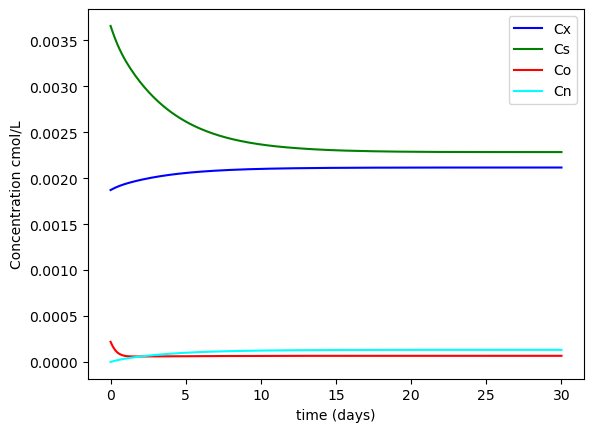

In [65]:
D=1/4
Cfs=0.1/MM_S
Cfo=Co_sat
Cfx=0.05/MM_X
Cf=[0.1/MM_S,Co_sat,0,0]
Co=[0.1/MM_S,Co_sat,0.05/MM_X,0]

tmax = 30                               # time to integrate to  
tspan=np.linspace(0,tmax,200)            # define the timespan of the integration and increments where values will be reported
tper = (0,tmax)                          #defining the starting and end time for the solve_IVP function

Ci = solve_ivp(ferm_eq, tper, Co, dense_output = True, method = "LSODA")    # integration via odeint that calls apon response_fun

Cs, Co, Cx, Cn = Ci.sol(tspan)

plt.figure(3)
plt.plot(tspan, Cx, color='blue', label='Cx')
plt.plot(tspan, Cs, color='green', label='Cs')
plt.plot(tspan, Co, color='red', label='Co')
plt.plot(tspan, Cn, color='cyan', label='Cn')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (days)') 
plt.show() 

In [49]:
Cf

[0.00365764447695684, 0.00021875, 0, 0]

In [50]:
Cf[0]

0.00365764447695684